In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('clean_data.csv')
df.sample(10)

,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE,Class Type,Pets,Armor Type
1316,SA,SA2,Alliance,Paladin,6,3,32,118000,11454,399,0,1,dps,1,Both,0,Plate
5314,TK,TK37,Alliance,Paladin,1,0,5,9173,1818,242,0,1,dps,1,Both,0,Plate
3878,DG,DG6,Alliance,Priest,5,0,36,94247,23782,777,1,0,dps,0,Ranged,0,Cloth
4258,TP,TP21,Alliance,Priest,6,4,31,134000,41314,613,1,0,dps,1,Ranged,0,Cloth
19,WG,WG1,Horde,Warrior,4,1,17,59125,13679,390,1,0,dps,0,Melee,0,Plate
1076,TP,TP2,Horde,Shaman,1,3,16,3506,34528,519,1,0,heal,0,Both,0,Mail
353,BG,BG1,Alliance,Hunter,0,1,7,9475,1849,189,0,1,dps,0,Both,1,Mail
2080,SM,SM15,Alliance,Warlock,4,5,29,87132,31513,558,1,0,dps,0,Ranged,1,Cloth
1374,SM,SM8,Horde,Paladin,4,0,38,54113,17632,524,1,0,dps,0,Both,0,Plate
2798,AB,AB10,Alliance,Shaman,0,8,18,3538,50332,241,0,1,heal,0,Both,0,Mail


In [3]:
columns_heatmap = ['KB', 'D', 'HK', 'DD', 'HD', 'Honor', 'Win', 'Lose', 'BE', 'Pets']
heatmap = df[columns_heatmap]

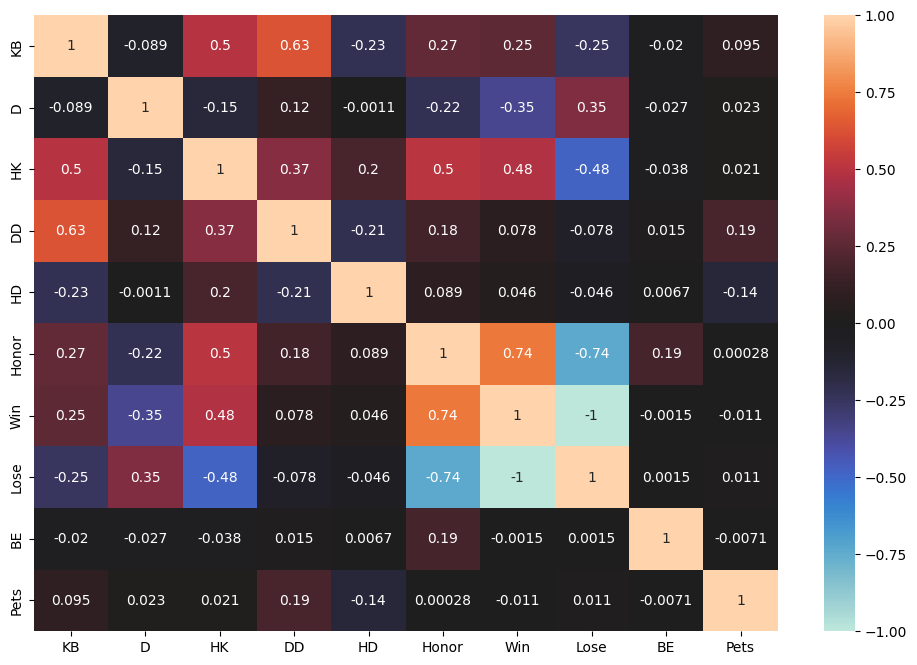

In [4]:
sns.heatmap(data=heatmap.corr(), annot=True, cmap=sns.color_palette("icefire", as_cmap=True))

fig=plt.gcf()
fig.set_size_inches(12,8)

plt.savefig('images/heatmap.png')

plt.show()

In [5]:
# Honorable kills - dobrze koleruja z Win, Honor i Killing Blows. Koleracje te nie powinny burzyć modelu. 
# Widzimy też że HK są nieznacznie powiązane z 'Death'. Ma to sens, gdyż jeśli gracz ma więcej HK to rzadziej umiera. 

# Damage done i Killing Blows - wysoka korelacja, ale nie aż tak wysoka aby popsuć model.

# Honor i Win - widzimy, że te 2 zmienne są mocno skolerowane. Jeżeli byśmy chcieli utowrzyć model, 
# który będzie przewidywał wygraną, zmienna 'Honor' będzie tą najważniejszą. W takim wypadku będziemy musieli pomyśleć o jej 
# usunięciu

# Win i Lose - idealna korelacja ujemna.

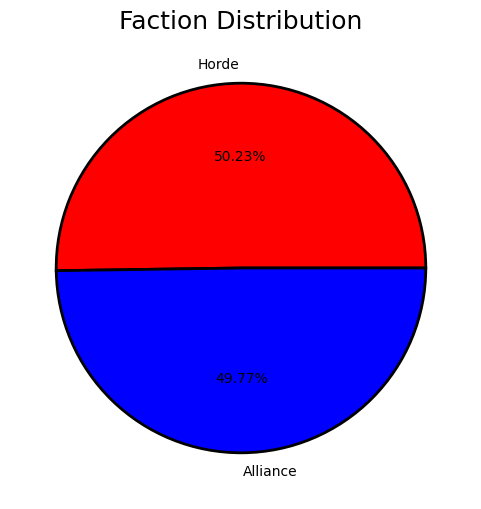

In [6]:
wedgeprops = {'linewidth':2, 'edgecolor':'k', 'linestyle':'solid'}
plt.figure(figsize=(6,6))
plt.pie(df['Faction'].value_counts(), colors=['red', 'blue'], labels=df['Faction'].unique(), autopct='%1.2f%%', wedgeprops=wedgeprops)
plt.title('Faction Distribution', size=18)

plt.savefig('images/faction_distribution.png')

plt.show()

In [7]:
# Możemy zayważyć, że wybór frakcji był bardzo zbalansowany, różnica wynosiła zaledwie 0,5%

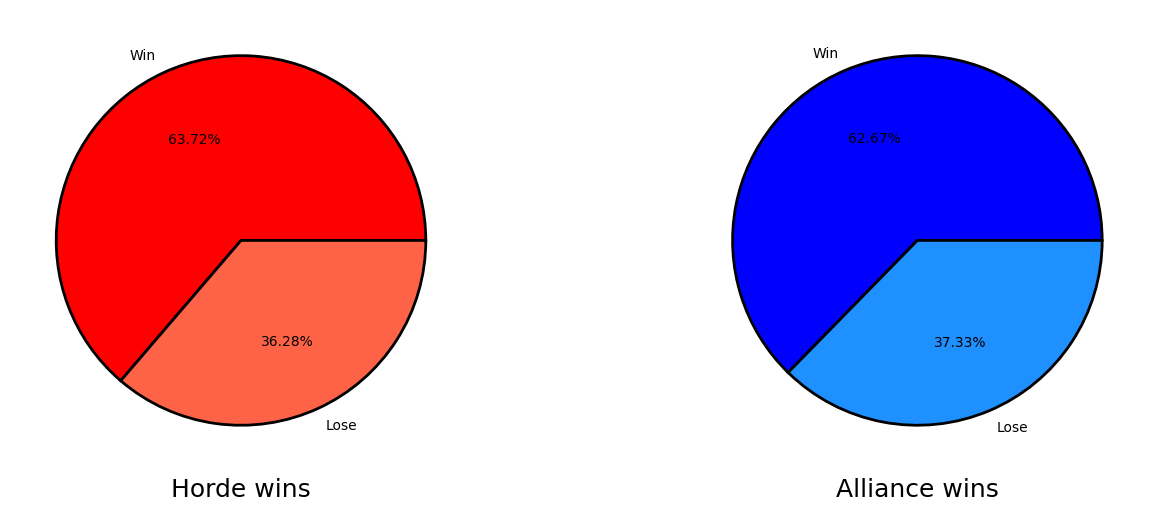

In [8]:
wedgeprops_2 = {'linewidth':2, 'edgecolor':'k', 'linestyle':'solid'}
horde_wins = df[df['Faction'] == 'Horde']['Win'].value_counts()
alliance_wins = df[df['Faction'] == 'Alliance']['Win'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].pie(horde_wins, colors=['red', 'tomato'], labels=['Win', 'Lose'], autopct='%1.2f%%', wedgeprops=wedgeprops_2)
axs[0].set_xlabel('Horde wins', size=18)

axs[1].pie(alliance_wins, colors=['blue', 'dodgerblue'], labels=['Win', 'Lose'], autopct='%1.2f%%', wedgeprops=wedgeprops_2)
axs[1].set_xlabel('Alliance wins', size=18)

plt.savefig('images/faction_win.png')

plt.show()

In [9]:
# Wykresy pokazują iż bilans wygranych i przegranych jest porównywalny do siebie, ale z lekką korzyścią dla Hordy.
# Ale to, że ten bilnas jest porównywalny jest to dobry znak iż wskazuje, że balans klasami jest dobry i nie faworyzują
# żadnej z frakcji.

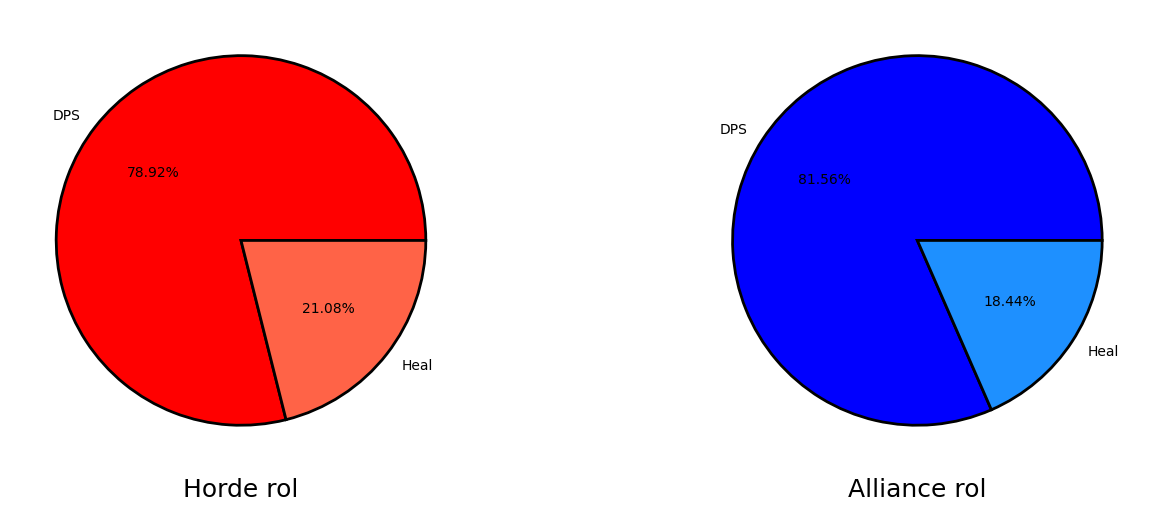

In [10]:
wedgeprops_3 = {'linewidth':2, 'edgecolor':'k', 'linestyle':'solid'}
horde_rol = df[df['Faction'] == 'Horde']['Rol'].value_counts()
alliance_rol = df[df['Faction'] == 'Alliance']['Rol'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].pie(horde_rol, colors=['red', 'tomato'], labels=['DPS', 'Heal'], autopct='%1.2f%%', wedgeprops=wedgeprops_3)
axs[0].set_xlabel('Horde rol', size=18)

axs[1].pie(alliance_rol, colors=['blue', 'dodgerblue'], labels=['DPS', 'Heal'], autopct='%1.2f%%', wedgeprops=wedgeprops_3)
axs[1].set_xlabel('Alliance rol', size=18)

plt.savefig('images/faction_rol.png')

plt.show()

In [11]:
# Rozkład ról jest bardzo podobny, chociaż widzimy, że Przymierze ma ciut większy DPS.
# Jednak rozbieżność nie jest na tyle duża, aby się tym zamartwiać.

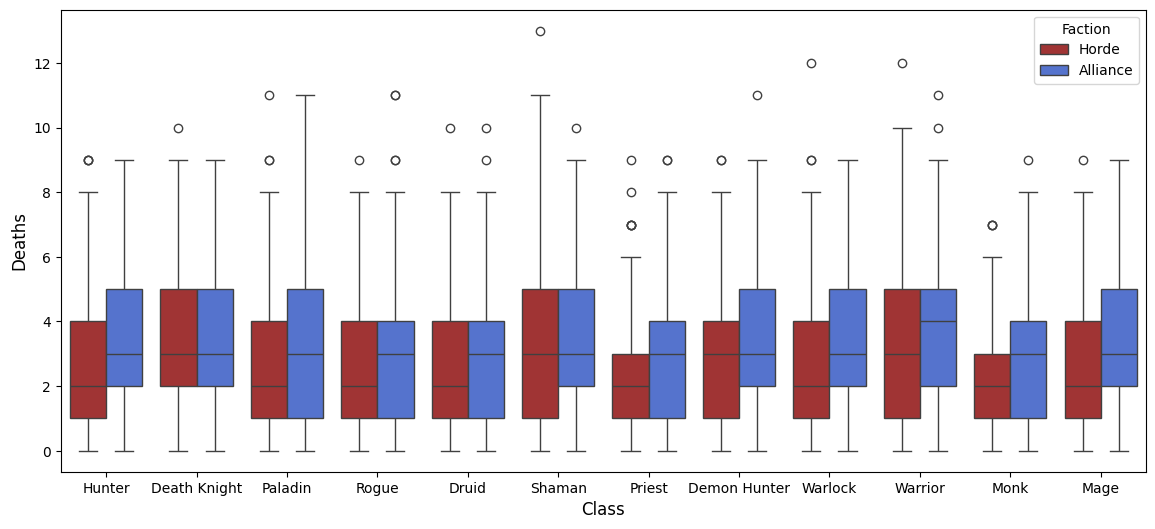

In [12]:
faction = {'Alliance':'royalblue', 'Horde':'firebrick'}
boxplot = sns.boxplot(x='Class', y='D', hue='Faction', data=df, palette=faction)

boxplot.set_xlabel('Class', fontsize=12)
boxplot.set_ylabel('Deaths', fontsize=12)

fig=plt.gcf()
fig.set_size_inches(14,6)

plt.savefig('images/faction_class_deaths.png')

plt.show()

In [13]:
# Jak można zauważyć na wykresie, gracze Alliance mają ciut więcej zgonów niż gracze Hordy. Widzimy na przykładzie klasy
# Huntera, Palladina, Priesta, Demon Huntera, Warlocka, Monka i Maga, że gracze Przymierza tych klas częściej umierają.
# Może to też wynikać z tego, iż w Hordzie mamy więcej graczy, która gra healami stąd ich większa przeżywalność.

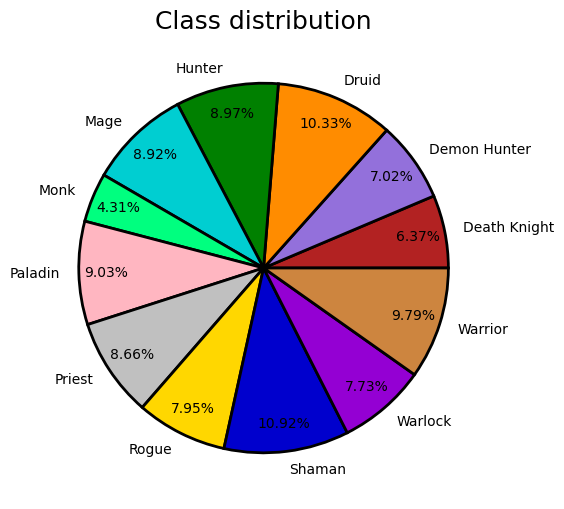

In [14]:
players_class = ['Death Knight', 'Demon Hunter', 'Druid', 'Hunter', 'Mage', 'Monk', 'Paladin', 'Priest', 'Rogue', 'Shaman', 'Warlock', 'Warrior']

class_colors = {'Hunter':'green', 'Death Knight':'firebrick', 'Paladin':'lightpink', 'Rogue':'gold', 'Druid':'darkorange',
                'Shaman':'mediumblue', 'Priest':'silver', 'Demon Hunter':'mediumpurple', 'Warlock':'darkviolet', 
                'Warrior':'peru', 'Monk':'springgreen', 'Mage':'darkturquoise'}

wedgeprops_4 = {'linewidth':2, 'edgecolor':'k', 'linestyle':'solid'}

plt.figure(figsize=(12, 6))
df.groupby('Class').size().plot(kind='pie', autopct='%1.2f%%', colors = [class_colors[key] for key in players_class], 
                                wedgeprops=wedgeprops_4, pctdistance=0.85)
plt.title('Class distribution', size=18)

plt.savefig('images/class_distribution.png')

plt.show()

In [15]:
# Balans klas jest porównywalny do siebie. Jedynie klasa Mnicha odstaje znacząco od reszty.

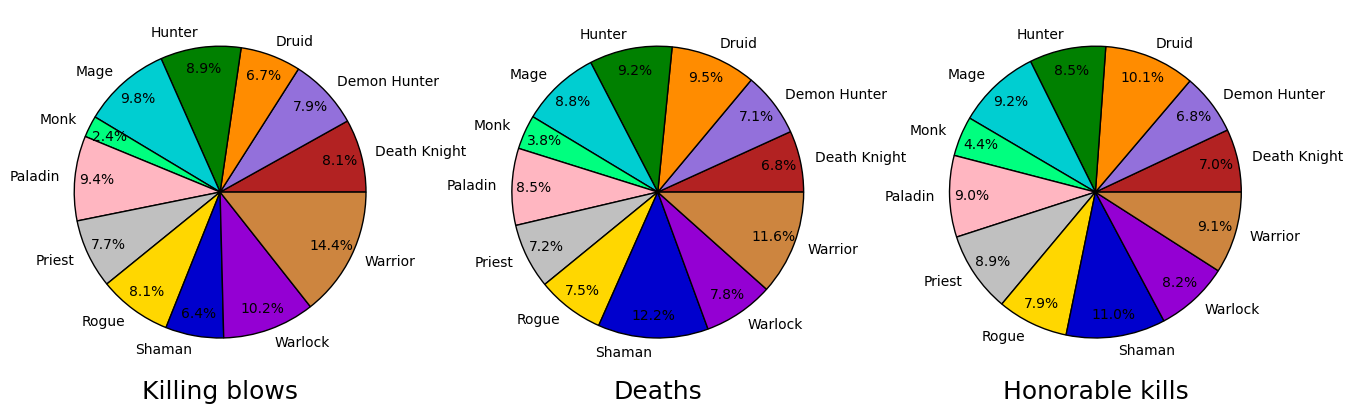

In [16]:
class_KB = df.groupby('Class')['KB'].sum()
class_D = df.groupby('Class')['D'].sum()
class_HK = df.groupby('Class')['HK'].sum()

fig, axs = plt.subplots(1, 3, figsize=(16, 6))
wedgeprops_5 = {'linewidth':1, 'edgecolor':'k', 'linestyle':'solid'}

axs[0].pie(class_KB, colors = [class_colors[key] for key in players_class], autopct='%1.1f%%', wedgeprops=wedgeprops_5, 
           labels=players_class, pctdistance=0.85)
axs[0].set_xlabel('Killing blows', size=18)

axs[1].pie(class_D, colors = [class_colors[key] for key in players_class], autopct='%1.1f%%', wedgeprops=wedgeprops_5, 
           labels=players_class, pctdistance=0.85)
axs[1].set_xlabel('Deaths', size=18)

axs[2].pie(class_HK, colors = [class_colors[key] for key in players_class], autopct='%1.1f%%', wedgeprops=wedgeprops_5,
           labels=players_class, pctdistance=0.85)
axs[2].set_xlabel('Honorable kills', size=18)

plt.savefig('images/class_kb_d_hk.png')

plt.show()

In [17]:
# Killing blows - jak widzimy, klasy które dominuja, jesli chodzi o osobiste zabójstwa to Warrior oraz Warlock. Zdecydowanie, 
# klasa Monka jest w tyle, ale może to być spowodowane tym iż w naszym danych większość graczy Monka, preferowała role healera niż dpsa.

# Deaths - Najwięcej ponosiło śmierci klasy Szamanów i Warriorów, klasa Monka posiada ich najmniej. Może to być spowodowane tak samo jeśli
# chodzi o Killing blowsy oraz iż w naszych danych nie było dużo Monków.

# Honorable kills - w tej kategorii króluje zdecydowane klasa Shamana i Druida. Prawdopodbnie są to klasy, które pomagają swoim kompanom 
# na każdej możliwej płaszczyźnie.

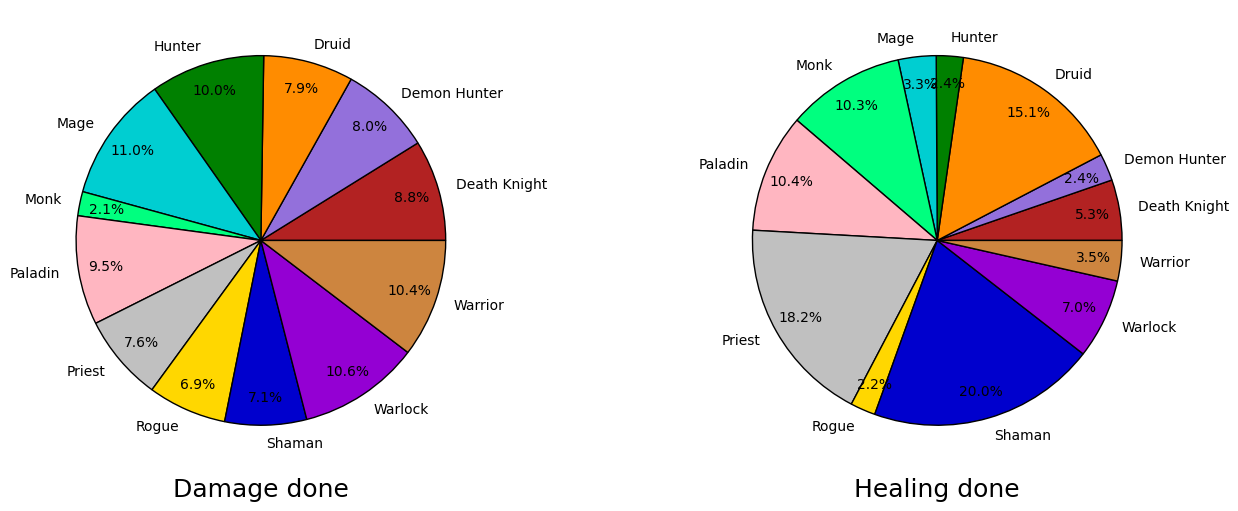

In [18]:
class_DD = df.groupby('Class')['DD'].sum()
class_HD = df.groupby('Class')['HD'].sum()

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
wedgeprops_6 = {'linewidth':1, 'edgecolor':'k', 'linestyle':'solid'}

axs[0].pie(class_DD, colors = [class_colors[key] for key in players_class], autopct='%1.1f%%', wedgeprops=wedgeprops_6, 
           labels=players_class, pctdistance=0.85)
axs[0].set_xlabel('Damage done', size=18)

axs[1].pie(class_HD, colors = [class_colors[key] for key in players_class], autopct='%1.1f%%', wedgeprops=wedgeprops_6, 
           labels=players_class, pctdistance=0.85)
axs[1].set_xlabel('Healing done', size=18)

plt.savefig('images/class_dd_hd.png')

plt.show()

In [19]:
# Damage done - jak widzimy klasa Mnicha, mocno odstaje od reszty, oznacza to, iż ta klasa jest wykorzsystwana bardziej do lecznia,
# bądź tylko tak jest w naszym zbiorze danych, poza tym reszta klas jest dość zrównoważona. W tej kategorii króluje klasa Maga

# Healing done - Leczenie jest to kategoria, która jest skierowana do wybranych klas, gdyż nie każda klasa ma 
# dobre umiejętności leczące. Teoria nasza potwierdza się, jeżli chodzi o klase Mnichów, zaliczają duży wzrost udziału w leczeniu.
# W tej kategorii natomiast króluje klasa Shamana i Kapłana, widzimy też duży udział Druidów.

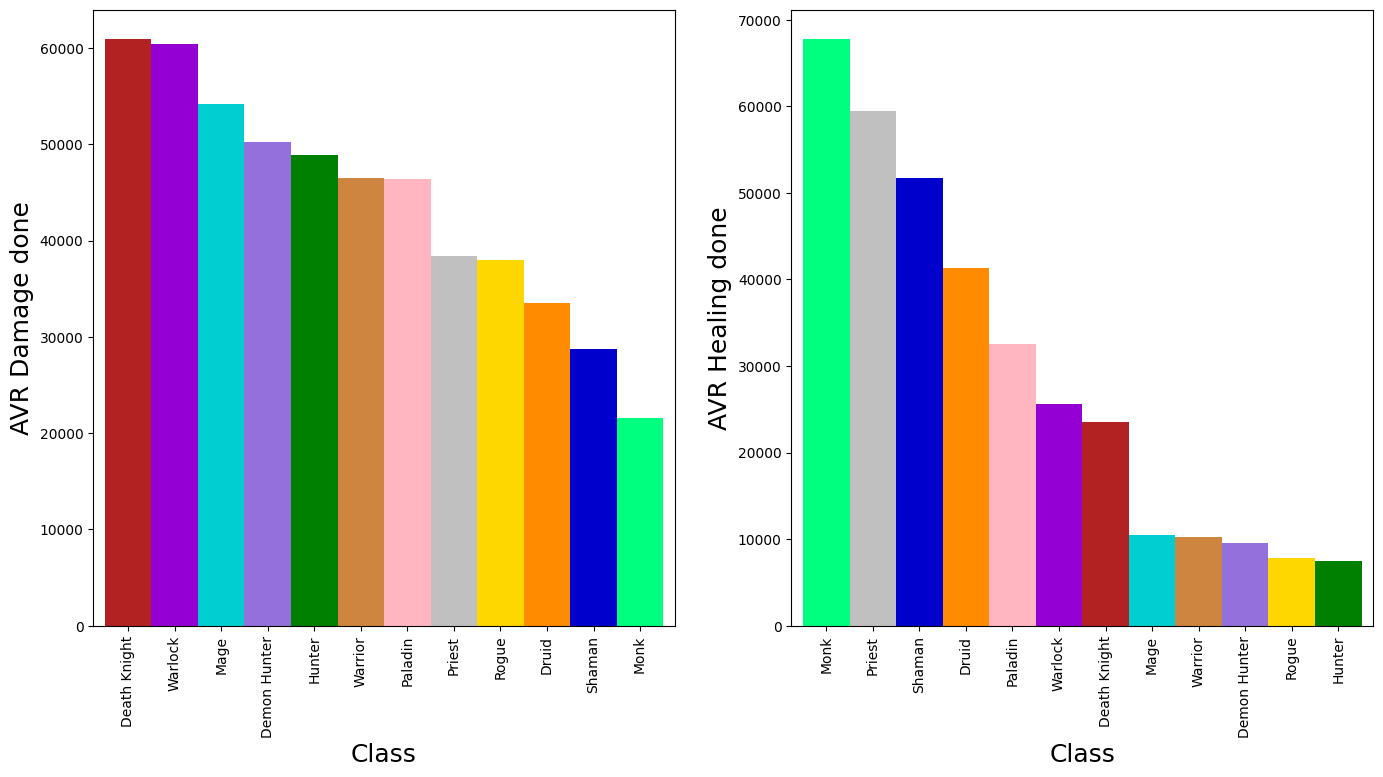

In [20]:
class_DD_avr = df.groupby('Class')['DD'].mean().sort_values(ascending=False).index
class_HD_avr = df.groupby('Class')['HD'].mean().sort_values(ascending=False).index

fig, axs = plt.subplots(1, 2, figsize=(16, 8))

df.groupby('Class')['DD'].mean().sort_values(ascending=False).plot(kind='bar', color=[class_colors[key] for key in class_DD_avr],
                                                                   width=1, ax=axs[0])
df.groupby('Class')['HD'].mean().sort_values(ascending=False).plot(kind='bar', color=[class_colors[key] for key in class_HD_avr],
                                                                   width=1, ax=axs[1])

axs[0].set_xlabel('Class', size=18)
axs[0].set_ylabel('AVR Damage done', size=18)

axs[1].set_xlabel('Class', size=18)
axs[1].set_ylabel('AVR Healing done', size=18)

plt.subplots_adjust(wspace=0.2, left=0.1, right=0.9)

plt.savefig('images/class_avr_dd_hd.png', bbox_inches='tight')

plt.show()

In [21]:
# Wykresy pokazają średnie zadane obrażenia i wyleczone
# AVR damage done - jak można zauważyć, najelpsi DPSi są to zarówno klasy walczące w zwarciu jak i klasy walczące na dystans
# Jest to dobry to znak, gdyż pokazuje nam, że klasy są dobrze zbalansowane. Jeżeli chodzi o ostatnie miejsca może to być spowodowane
# tym, że w naszym DataFramie gracze tych klas skupiali się bardziej na leczeniu niż na zadawaniu obrażeń

# AVR Healing done - Widzimy tutaj totalną dominacje Mnichów i Kapłanów. Może to oznaczać błąd w naszym DF (więcej graczy tych klas
# grali healami niż DPSami). Widzimy też, że takie klasy jak Łowca czy Wojownik mają leczenie, może to wynikać iż te klasy 
# posiadają umiejętności samoleczące.

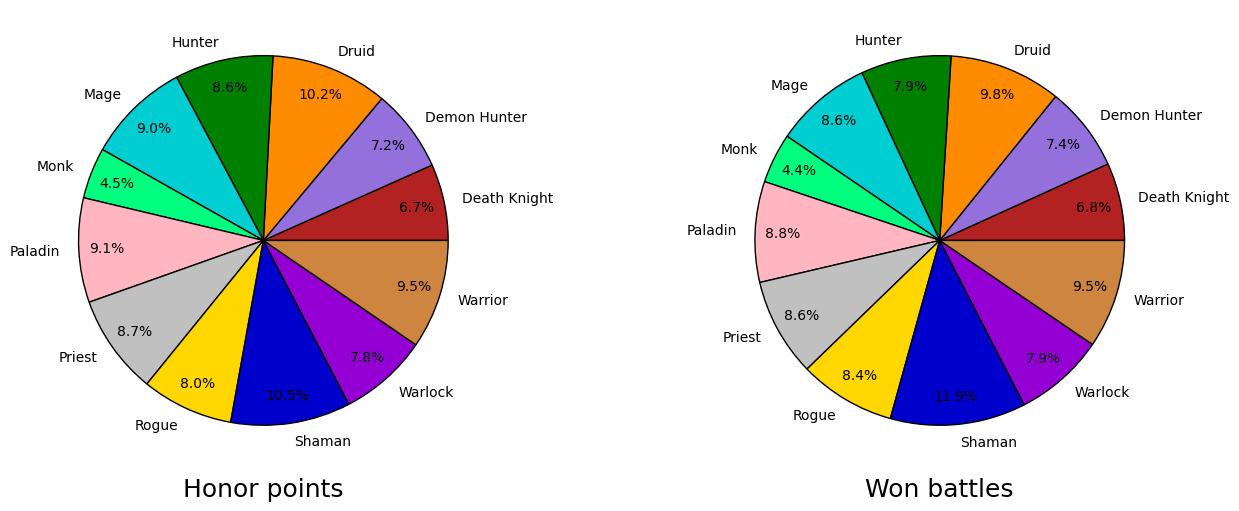

In [22]:
class_Honor = df.groupby('Class')['Honor'].sum()
class_Win = df.groupby('Class')['Win'].sum()

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
wedgeprops_6 = {'linewidth':1, 'edgecolor':'k', 'linestyle':'solid'}

axs[0].pie(class_Honor, colors = [class_colors[key] for key in players_class], autopct='%1.1f%%', wedgeprops=wedgeprops_6, 
           labels=players_class, pctdistance=0.85)
axs[0].set_xlabel('Honor points', size=18)

axs[1].pie(class_Win, colors = [class_colors[key] for key in players_class], autopct='%1.1f%%', wedgeprops=wedgeprops_6, 
           labels=players_class, pctdistance=0.85)
axs[1].set_xlabel('Won battles', size=18)

plt.savefig('images/class_hp_win.png')

plt.show()

In [23]:
# Honor points - Najwięcej punktów zdobywaja Szamani oraz Druidzi, możliwe iż najwięcej klas jakie brały idzie to własnie te. Klasa Monka
# zajmuje ostatnie miejsce możliwe iż, najmniej osób nią własnie grało. 

# Won battles - Znowu mamy tutaj dominacje Shamanów i Druidów. Bardzo możliwe, że ten wykres pokazuje jak mocnymi klasami są
# i fakt posiadania ich w drużynie ma większy wpływ na zwycięstwo.

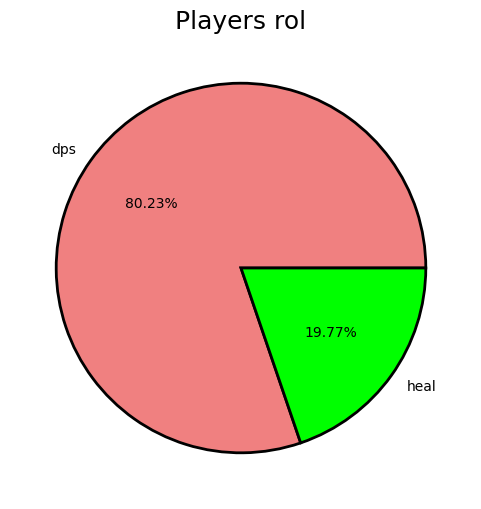

In [24]:
rol_color = ['lightcoral', 'lime']
wedgeprops_6 = {'linewidth':2, 'edgecolor':'k', 'linestyle':'solid'}

plt.figure(figsize=(6,6))

plt.pie(df['Rol'].value_counts(), colors=rol_color, labels=df['Rol'].unique(), autopct='%1.2f%%', wedgeprops=wedgeprops_6)


plt.title('Players rol', size=18)

plt.savefig('images/rol.png')

plt.show()

In [25]:
# Jak widzimy w naszym DF, większość graczy skupiała się na roli DPS.

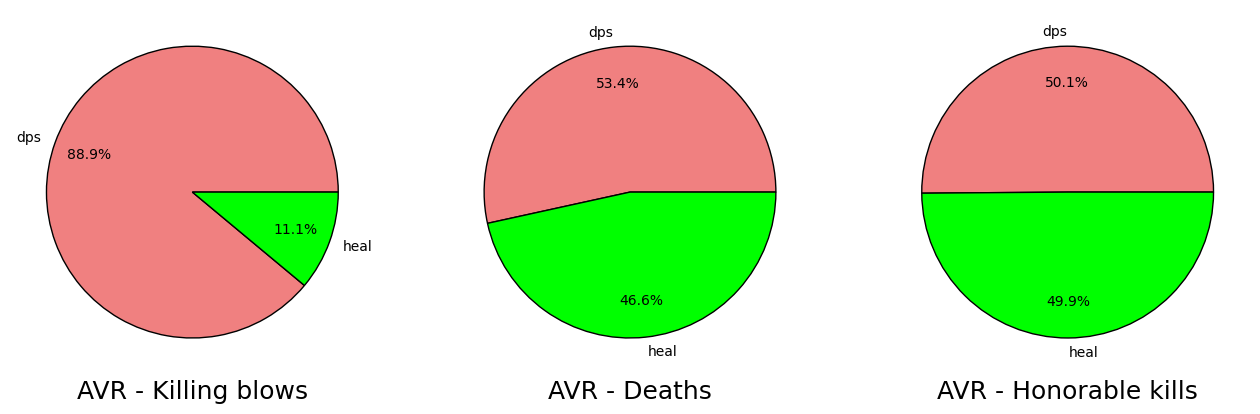

In [26]:
rol_KB = df.groupby('Rol')['KB'].mean()
rol_D = df.groupby('Rol')['D'].mean()
rol_HK = df.groupby('Rol')['HK'].mean()

fig, axs = plt.subplots(1, 3, figsize=(16, 6))
wedgeprops_7 = {'linewidth':1, 'edgecolor':'k', 'linestyle':'solid'}

axs[0].pie(rol_KB, colors = rol_color , autopct='%1.1f%%', wedgeprops=wedgeprops_7, labels=df['Rol'].unique(), pctdistance=0.75)
axs[0].set_xlabel('AVR - Killing blows', size=18)

axs[1].pie(rol_D, colors = rol_color, autopct='%1.1f%%', wedgeprops=wedgeprops_7, labels=df['Rol'].unique(), pctdistance=0.75)
axs[1].set_xlabel('AVR - Deaths', size=18)

axs[2].pie(rol_HK, colors = rol_color, autopct='%1.1f%%', wedgeprops=wedgeprops_7, labels=df['Rol'].unique(), pctdistance=0.75)
axs[2].set_xlabel('AVR - Honorable kills', size=18)

plt.savefig('images/rol_avr_kd_d_hk.png')

plt.show()

In [27]:
# AVR Killing blows - Do przewidzenia, iż klasy dps będą miały zdecydowaną przewagę w osobistych zabójstwach.

# AVR Deaths - Widzimy, że DPSi średnio ginał więcej, ma to sens. Klasy leczące mają większą przeżywalność dzięki swoim zaklęciom.
# Zdarza się często, że gracze idą w bój bez pomocy medyków.

# AVR Honorable kills - jest to dobra wiadomość, gdyż pokazuje nam, że każda rola ma sprawiedliwy udział w walce.

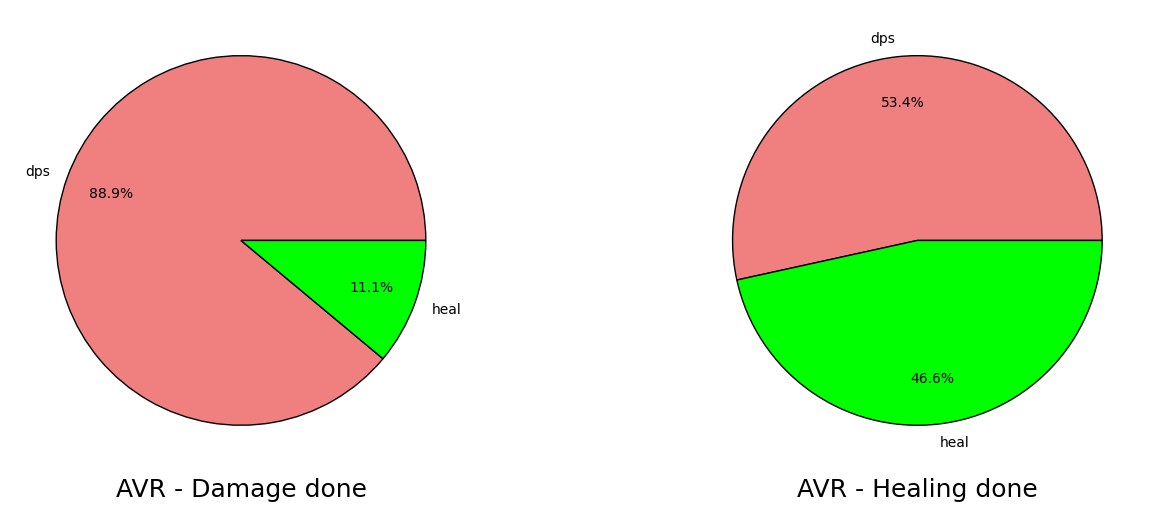

In [28]:
rol_DD = df.groupby('Rol')['DD'].mean()
rol_HD = df.groupby('Rol')['HD'].mean()

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
wedgeprops_8 = {'linewidth':1, 'edgecolor':'k', 'linestyle':'solid'}

axs[0].pie(rol_KB, colors = rol_color , autopct='%1.1f%%', wedgeprops=wedgeprops_8, labels=df['Rol'].unique(), pctdistance=0.75)
axs[0].set_xlabel('AVR - Damage done', size=18)

axs[1].pie(rol_D, colors = rol_color, autopct='%1.1f%%', wedgeprops=wedgeprops_8, labels=df['Rol'].unique(), pctdistance=0.75)
axs[1].set_xlabel('AVR - Healing done', size=18)

plt.savefig('images/rol_avr_dd_hd.png')

plt.show()

In [29]:
# AVR Damage done - do przewidzenia, klasy dps będą zadawały większy damage od klas leczących

# AVR Healing done - Tutaj mamy dość dziwne zjawisko, które możemy wytłumaczyć tym, klasy, które skupiały się na obrażeniach mają w swoim 
# asortymecie umiejętności leczące i w kryzysowych sytuacjach z nich korzystały. Stąd ta delikatna przewaga.

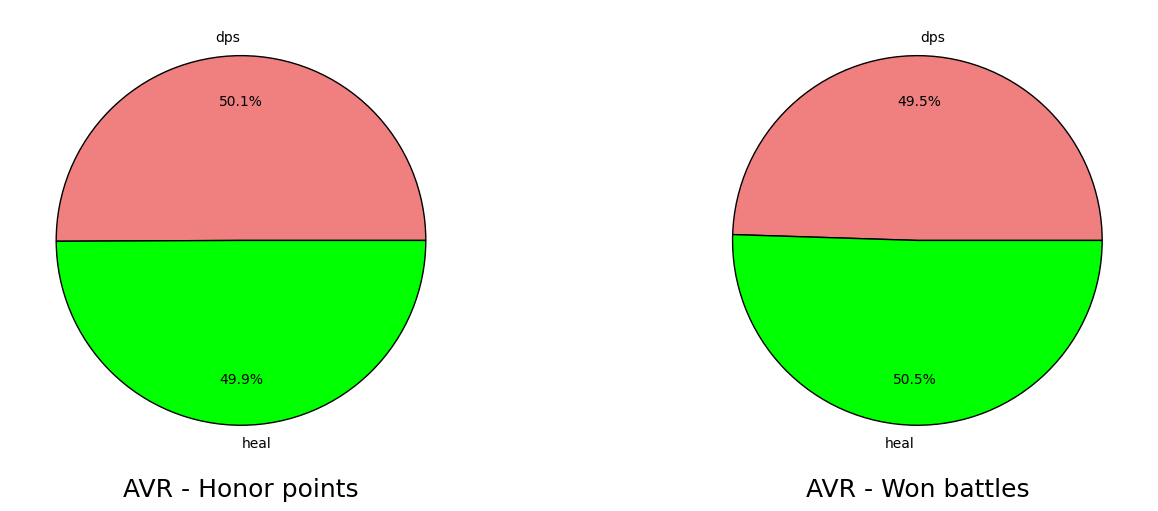

In [30]:
rol_Honor = df.groupby('Rol')['Honor'].mean()
rol_Win = df.groupby('Rol')['Win'].mean()

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
wedgeprops_9 = {'linewidth':1, 'edgecolor':'k', 'linestyle':'solid'}

axs[0].pie(rol_Honor, colors = rol_color , autopct='%1.1f%%', wedgeprops=wedgeprops_9, labels=df['Rol'].unique(), pctdistance=0.75)
axs[0].set_xlabel('AVR - Honor points', size=18)

axs[1].pie(rol_Win, colors = rol_color, autopct='%1.1f%%', wedgeprops=wedgeprops_9, labels=df['Rol'].unique(), pctdistance=0.75)
axs[1].set_xlabel('AVR - Won battles', size=18)

plt.savefig('images/rol_avr_hp_win.png')

plt.show()

In [31]:
# AVR Honor points - jak widzimy, praktycznie nie ma żandej różniżcy, jest to dobry znak gdyż pokazuje, że rola nie ma żadnego wpływu na
# zdobywaniu punktów honoru.

# AVR Won battles - sprawiedliwie, tak samo jeśli chodzi o punktu honoru. 

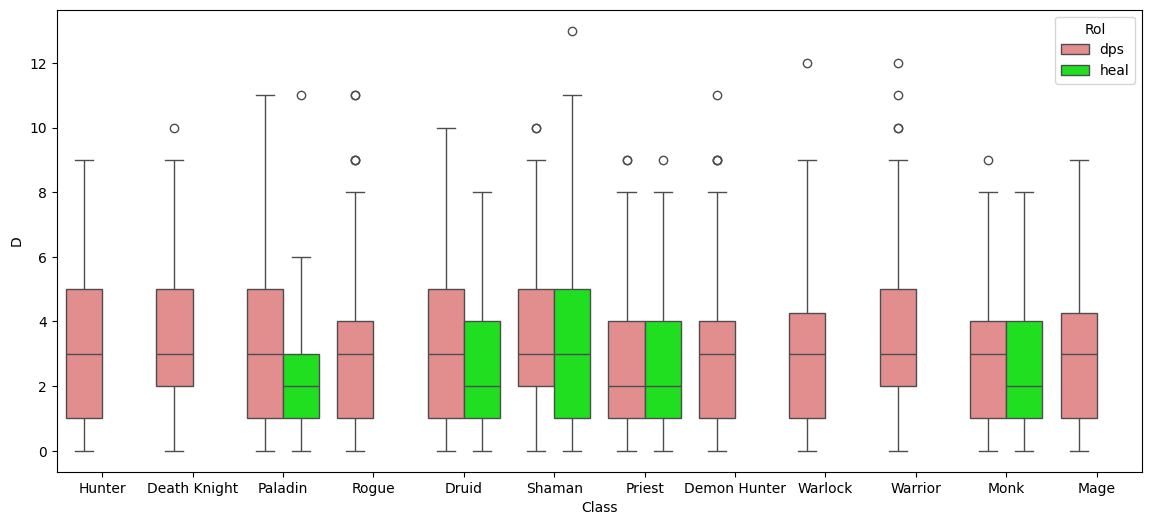

In [32]:
plot2 = sns.boxplot(x='Class', y='D', hue='Rol', data=df, palette=rol_color)

boxplot.set_xlabel('Class', fontsize=12)
boxplot.set_ylabel('Deaths', fontsize=12)

fig=plt.gcf()
fig.set_size_inches(14,6)

plt.savefig('images/rol_class_d.png')

plt.show()

In [33]:
# Jak widzimy, w przypadku DPSów wyniki są bardzo podobne. Jeżeli chodzi o klasy leczące to widzimy, że Paladyni i Druidzi są 
# bardziej przeżywalni od reszty uzdrowicieli.